In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree


In [8]:
data=pd.read_excel("pacific.xlsx")
print(data.head())

         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

In [9]:
data.Status=pd.Categorical(data.Status)
data['Status']=data.Status.cat.codes
print(data.Status)

0      2
1      2
2      2
3      2
4      2
      ..
294    2
295    2
296    0
297    0
298    0
Name: Status, Length: 299, dtype: int8


C:\Users\UTKARSH\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


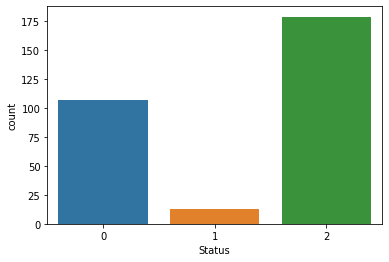

In [10]:
sns.countplot(data['Status'],label='count')
plt.show()

In [11]:
pred_columns=data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)

prediction_var=pred_columns.columns
print(list(prediction_var))


['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_9592\2326326160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['Status'],axis=1,inplace=True)
C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_9592\2326326160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['Event'],axis=1,inplace=True)
C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_9592\2326326160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(209, 22)
(90, 22)


In [14]:
train_X=train[prediction_var]
train_Y=train['Status']
print(list(train.columns))
test_X=test[prediction_var]
test_Y=test['Status']
print(list(test.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']
['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [15]:
model=tree.DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

In [16]:
df=pd.DataFrame(prediction,test_Y)
print(df)

        0
Status   
2       2
2       2
0       0
0       0
0       0
...    ..
0       0
2       2
2       2
0       0
0       0

[90 rows x 1 columns]


In [17]:
print(metrics.accuracy_score(prediction,test_Y))

1.0
